> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDb movie data!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
import pandas as pd 
movie = pd.read_csv('tmdb_movies.csv') # reading the file 
movie.head()                           # Printing top 5 rows of data

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174799923.1,1.385749e+09


In [4]:
movie.shape # checking # of rows and columns

(10866, 21)

In [5]:
sum(movie.duplicated()) # finding number of duplicated rows

1

In [6]:
movie.isnull().sum() # finding the null values for each column

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
movie.dtypes #checking the datatypes of each column

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

we identified duplicated rows, missing/null values and unrleated columns. Now we need to clean the data by removing these respective rows and columns from the table.

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

In [9]:
movie.drop_duplicates(inplace=True)  #Removing the duplicate rows.
sum(movie.duplicated())  # Confirmation for removal of duplicated rows

0

In [10]:
movie = movie.drop(movie[movie.budget_adj== 0].index) #removing zero values from budget_adj columns
movie = movie.drop(movie[movie.revenue_adj== 0].index) #removing zero values from revenue_adj columns

movie.shape

(3854, 21)

In [11]:
movie.drop(['budget','revenue','homepage','overview','vote_count'],1,inplace=True) # Removing unwanted columns
movie.dtypes # checking columns for confoirmation

id                        int64
imdb_id                  object
popularity              float64
original_title           object
cast                     object
director                 object
tagline                  object
keywords                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Finding the profits based on the average ratings.!)

### Considering Budget_adj and Revenu_adj columns for calculating profits for each movie. (I think Budget_adj and Revenu_adj columns are considered as these values are adjusted according to the inflation and provides a good side by side comparision.)

In [12]:
movie['profit'] = ((movie['revenue_adj']-movie['budget_adj'])/1000000) #adding new column to find the profits in millinons

In [13]:
x = movie.groupby(['vote_average'],as_index = False).mean().loc[:,'vote_average'] #group by rating column and get the rating average 
y = movie.groupby(['vote_average'],as_index = False)['profit'].mean().loc[:,'profit'] #group by rating column, profit column and get the profit average 

# Plotting bar graph to see the findings average rating versus profits 

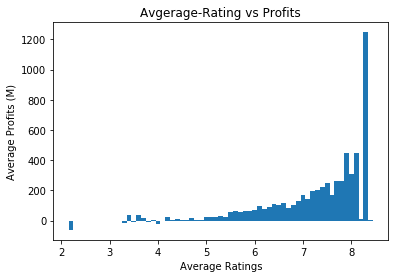

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
bar_width=0.1   #thickness of bar 
plt.bar(x,y,bar_width) #plot bar graph with x-average rating and y- profit axis along with thickness of bar 
plt.title('Avgerage-Rating vs Profits') #giving title name
plt.xlabel('Average Ratings') #labelling the x-axis
plt.ylabel('Average Profits (M)') #labelling the y-axis
plt.show() #displaying the graph

### Research Question 2  (Understanding film industry revenue over the years !)

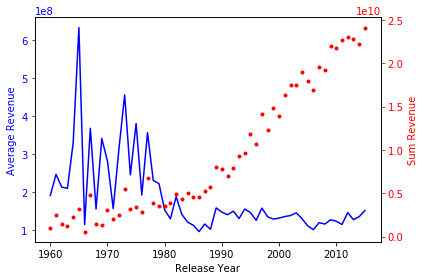

In [21]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()    # creates a figure with subplot
release_year= movie.groupby(['release_year']).mean().index #group by release year column and get average year, x-axis
avg_revenue = movie.groupby(['release_year'],as_index = False).mean().loc[:,'revenue_adj'] #group by release year column and get average revenue_adj , y1-axis

ax1.plot(release_year, avg_revenue, 'b-') #plotting on plot with x and y1 
ax1.set_xlabel('Release Year') #setting the label for x-axis
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Average Revenue', color='b') #setting the label for y1-axis
ax1.tick_params('y', colors='b') #mark the tick on y1-axis and color with blue 

ax2 = ax1.twinx() #share same x-axis
sum_revenue = movie.groupby(['release_year'],as_index = False).sum().loc[:,'revenue_adj'] #group by release year column and get sum revenue_adj,y2-axis
ax2.plot(release_year, sum_revenue, 'r.') #plotting on plot with x and y2 
ax2.set_ylabel('Sum Revenue', color='r') #setting the label for y1-axis
ax2.tick_params('y', colors='r') #mark the tick on y1-axis and color with red

fig.tight_layout() #layout the figure.
plt.show() #display the graph


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. It's also a good idea to look over the project rubric, found on the project submission page at the end of the lesson.

> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!

#### Research Question 1 (Finding the profits based on the average ratings.!)
Conclusion: From the plot we can see there is a strong correlation between the ratings and profits. Better the rating more people will watch the movie which in turn give more revenue and leads to profits.

#### Research Question 2  (Understanding film industry revenue over the years !)
Conclusion: plot describes the change in average revenue_adj and sum revenue_adj over the years. We can observe that sum revenue_adj increasing rapidly over the years whereas the average revenue_adj is fluctuating. Average revenue is peak at 1965. Even though film industry is making more revenue but the average revenue gradually went down from 1977. This suggest that we are making more movies for less revenue than previous years.

#### Referrences: 
https://pandas.pydata.org/pandas-docs/stable/visualization.html
https://stackoverflow.com/questions/42506819/graph-with-multiple-x-and-y-axis-using-matplotlib

In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0